In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from scipy.special import factorial

In [24]:
frame_length = 26*2
number_of_drops = 1e6 # Scientific notation: for example 5e7 = 5*10^7 or 3e-4 = 3*10^-4
max_simulated_users = 43
lambdas = np.arange(0.025,0.26,0.025)
results_multi = np.array([[0,0,0,0,0,0,0,1,1,4,9,31,48,109,185,405,760,1500,2824,5344,9955,18043,31639,53846,87522,135260,202779,287458,388298,501163,617254,725109,817552,890115,940016,971227,987446,995548,998650,999688,999930,999993,999998]
,[0,0,0,1,1,8,6,23,18,37,57,82,141,210,354,617,1118,1902,3501,6212,11181,19707,33749,55747,89088,138116,202868,285499,385008,494875,609070,716303,809744,882216,934001,966831,985423,994446,998180,999447,999879,999983,999999]
,[0,4,13,32,40,70,94,129,173,196,258,370,468,619,812,1068,1608,2602,4092,7159,12014,20743,34725,56725,90365,138772,203136,287346,385796,496179,609774,718043,810006,882163,934562,967026,985741,994330,998138,999529,999894,999977,999997]])

In [25]:
largest_lambda = lambdas[-1]*frame_length
error = largest_lambda**(max_simulated_users+1) / factorial(max_simulated_users+1)
print(f'Approximation error for the given range of simulated users: {error}')

Approximation error for the given range of simulated users: 3.880682875211223e-06


In [26]:
def g(intensities):
    res_s = []
    for failure_prob in failure_probs:
        res = np.array([])
        for intensity in intensities:
            res = np.append(res, np.sum(failure_prob*np.exp(-intensity*frame_length)*(intensity*frame_length)**user_range / factorial(user_range)))
        res_s.append(res)
    return np.array(res_s).swapaxes(0,1)

In [27]:
failure_probs = results_multi/number_of_drops
error_probs = np.array([])
user_range = np.arange(1,max_simulated_users + 0.1, 1)
error_probs = g(lambdas)

In [28]:
xpoints = np.linspace(lambdas[0],lambdas[-1],1000)
curves = g(xpoints)

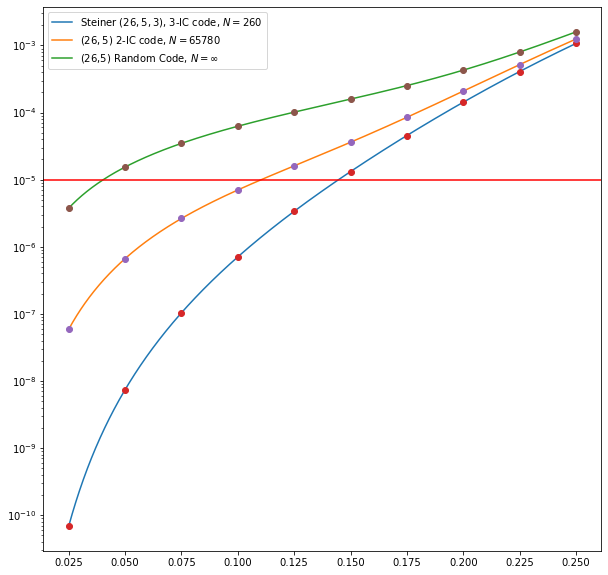

In [29]:
c_t = curves.swapaxes(0,1)
fig, ax = plt.subplots(figsize=(10,10))
fig.patch.set_facecolor('white')
line1, = ax.semilogy(xpoints, c_t[0], label='line1')
line2, = ax.semilogy(xpoints, c_t[1], label='line2')
line3, = ax.semilogy(xpoints, c_t[2], label='line3')
scatter = ax.plot(lambdas, error_probs, 'o')
ax.legend([line1, line2, line3], ["Steiner $(26,5,3)$, 3-IC code, $N=260$", "$(26,5)$ 2-IC code, $N=65780$", "(26,5) Random Code, $N=\infty$"])
plt.axhline(y = 1e-5, color = 'r', linestyle = '-')
_ = plt.xticks(lambdas) # Disable trash output by assigning it to _